In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#shape of data
data.shape

(150, 5)

In [4]:
#total info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


PREPROCESSING

In [5]:
#checking the missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
#fill the missing values with the median
data['SL'].fillna(round(data['SL'].median(),1),inplace = True)
data['SW'].fillna(round(data['SW'].median(),1), inplace=True)
data['PL'].fillna(round(data['PL'].median(),1), inplace = True)

In [7]:
data.isna().sum()
#there is no null values in the data

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Axes: >

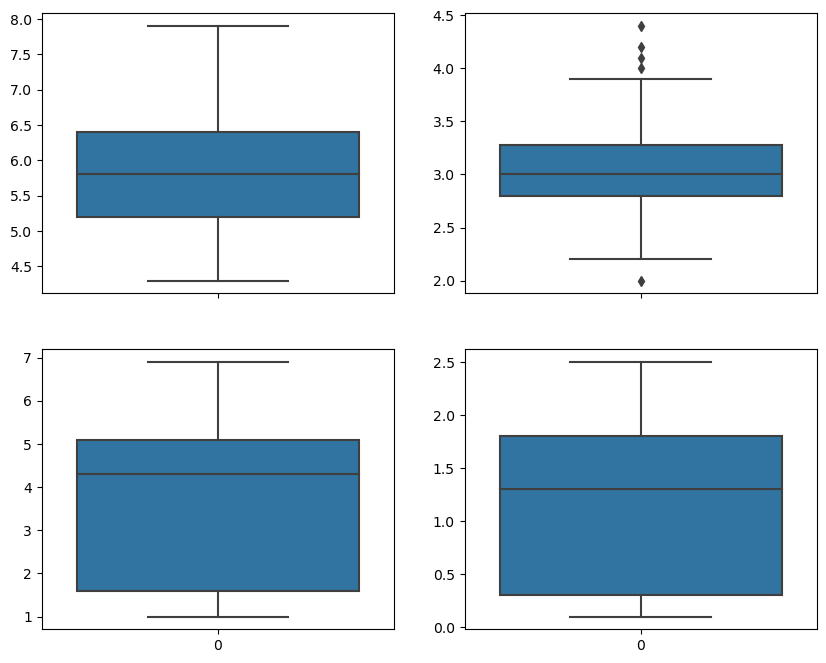

In [8]:
#boxplot to check outliers in the data
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,8))
sns.boxplot(ax=axes[0, 0], data=data['SL'])
sns.boxplot(ax=axes[0, 1], data=data['SW'])
sns.boxplot(ax=axes[1, 0], data=data['PL'])
sns.boxplot(ax=axes[1, 1], data=data['PW'])


The coloumn "SW" has outliers

In [9]:
#handle the outliers
Q1=data['SW'].quantile(0.25)
Q2 = data['SW'].quantile(0.50)
Q3=data['SW'].quantile(0.75)

IQR=Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+ (1.5*IQR)

data['SW']=np.where(data['SW']>upper_limit,upper_limit,np.where(data['SW']<lower_limit,lower_limit,data['SW']))

<Axes: >

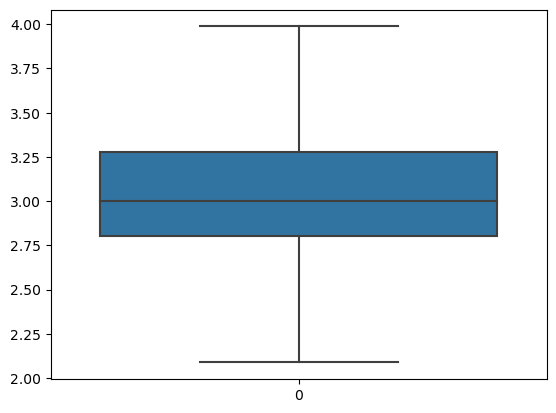

In [10]:
sns.boxplot(data["SW"])
#the outliers are removed

ENCODING 

In [11]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
data['Classification']= enc.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MIN-MAX SCALING

In [12]:
#seperate the data into x and y 
x = data.drop('Classification',axis=1)
y = data['Classification']

In [13]:
#scale the x values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [14]:
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.502851,0.470847,0.457778
std,0.224602,0.214364,0.293015,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.375000,0.101695,0.083333
50%,0.416667,0.480263,0.559322,0.500000
75%,0.583333,0.625000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [15]:
#split into train-test sets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Logistic Regression

In [16]:
reg = linear_model.LogisticRegression()
model = reg.fit(x_train, y_train)
reg_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Accuracy: ',round(accuracy_score(y_test,reg_pred),4))
print('Precision: ',round(precision_score(y_test,reg_pred,average='micro'),4))
print('Recall Score: ',round(recall_score(y_test,reg_pred,average='micro'),4))
print('f1 Score: ',round(f1_score(y_test,reg_pred,average='micro'),4))

Accuracy:  0.9667
Precision:  0.9667
Recall Score:  0.9667
f1 Score:  0.9667


# K-Nearest Neighbour

In [18]:
from sklearn.neighbors import KNeighborsClassifier
k_value = np.arange(3,15)
acc_value = []
for k in k_value:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    knn_pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,knn_pred)
    acc_value.append(acc)

Text(0, 0.5, 'Accuracy')

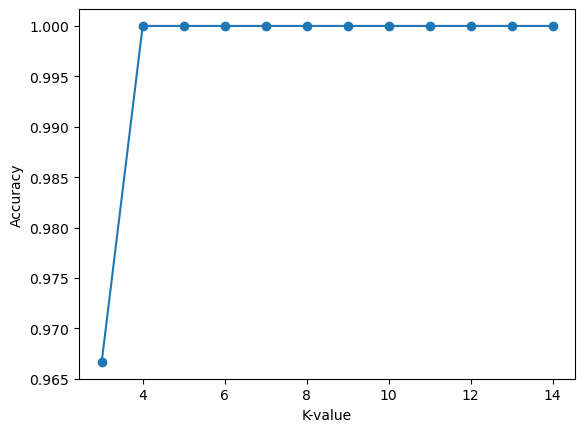

In [19]:
plt.plot(k_value,acc_value,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
knn_pred  = classifier.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,knn_pred))
print('Precision: ',precision_score(y_test,knn_pred,average='micro'))
print('Recall Score: ',recall_score(y_test,knn_pred,average='micro'))
print('f1 Score: ',f1_score(y_test,knn_pred,average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall Score:  1.0
f1 Score:  1.0


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred  = dt_model.predict(x_test)

print('Accuracy: ',accuracy_score(y_test,dt_pred))
print('Precision is: ',precision_score(y_test,dt_pred,average='micro'))
print('Recall Score: ',recall_score(y_test,dt_pred,average='micro'))
print('f1 Score: ',f1_score(y_test,dt_pred,average='micro'))

Accuracy:  1.0
Precision is:  1.0
Recall Score:  1.0
f1 Score:  1.0


# Support Vector Machine Model

In [22]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
svm_pred  = svm_linear.predict(x_test)

print('Accuracy: ',accuracy_score(y_test,svm_pred))
print('Precision: ',precision_score(y_test,svm_pred,average='micro'))
print('Recall Score: ',recall_score(y_test,svm_pred,average='micro'))
print('f1 Score: ',f1_score(y_test,svm_pred,average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall Score:  1.0
f1 Score:  1.0


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print('Accuracy: ',accuracy_score(y_test,rf_pred))
print('Precision: ',precision_score(y_test,rf_pred,average='micro'))
print('Recall Score: ',recall_score(y_test,rf_pred,average='micro'))
print('f1 Score: ',f1_score(y_test,rf_pred,average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall Score:  1.0
f1 Score:  1.0
